 ST1502 DAVI CA2 Assignment Source File

 Name: Lee Hong Yi

 Admin Number: 2223010
 
 Class: DAAA/FT/1B/05

In [340]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly as px
from shapely.geometry import Point, Polygon

In [341]:
bus_routes = pd.read_csv("./bus-routes-services-stops/bus_routes.csv")
bus_services = pd.read_csv("./bus-routes-services-stops/bus_services.csv")
bus_stops = pd.read_csv("./bus-routes-services-stops/bus_stops.csv")

In [342]:
uniqueRoute = bus_routes.drop_duplicates(subset = "ServiceNo", keep = "last")
uniqueService = bus_services.drop_duplicates(subset = "ServiceNo", keep = "first")
print(f"There are {uniqueRoute.shape[0]} unique services in uniqueRoute, with {uniqueRoute.shape[1]} fields of data.")
print(f"There are {uniqueService.shape[0]} unique services in uniqueServices, with {uniqueService.shape[1]} fields of data.")

There are 555 unique services in uniqueRoute, with 13 fields of data.
There are 555 unique services in uniqueServices, with 12 fields of data.


[]

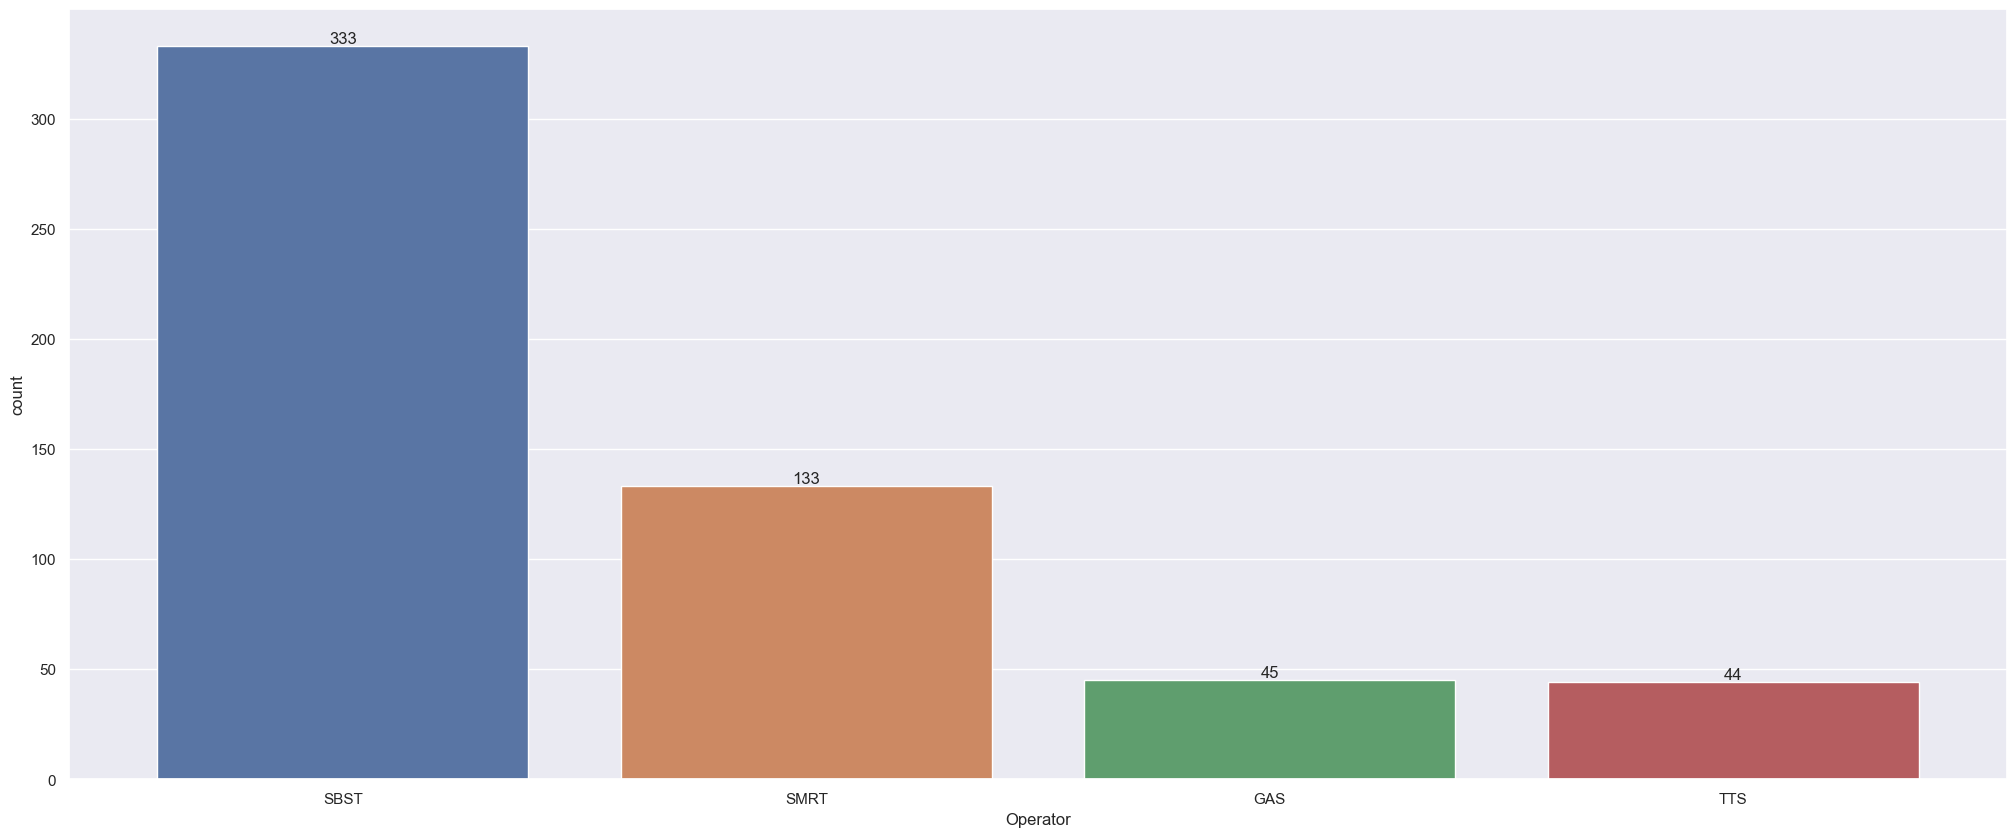

In [343]:
ax = sns.countplot(data=uniqueRoute, x='Operator', order=bus_routes['Operator'].value_counts().index)
sns.set(rc={'figure.figsize':(25,10)})
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.plot()

(555, 13)


[]

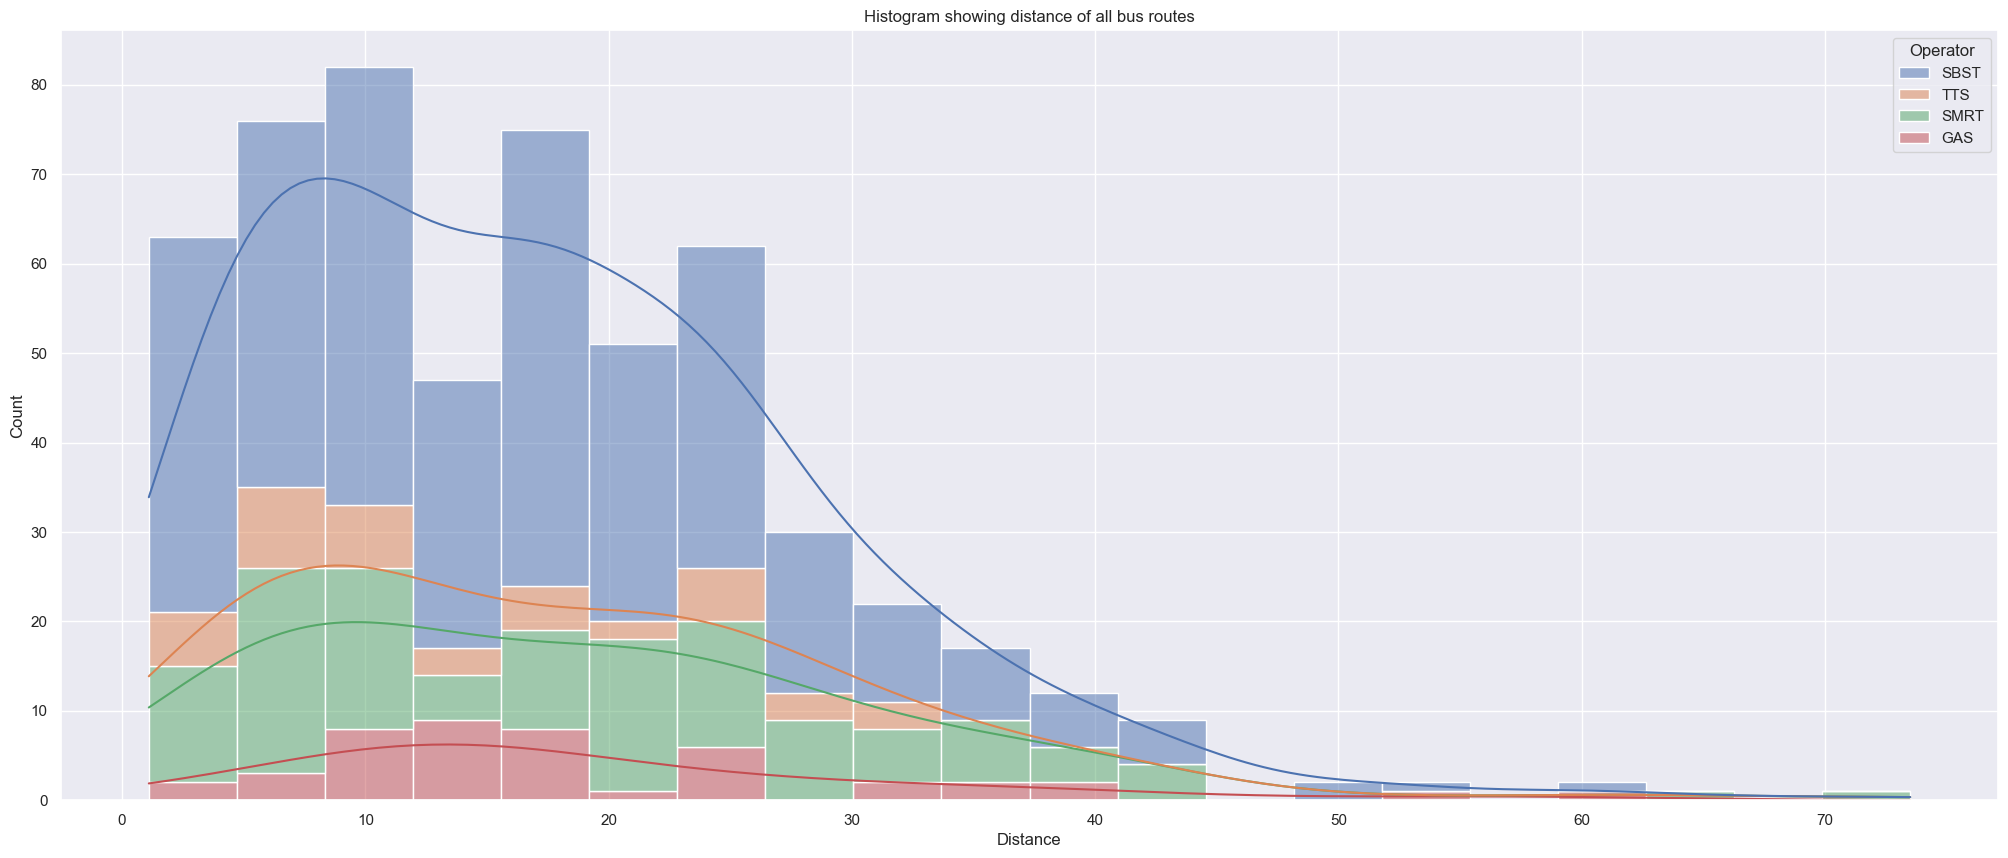

In [344]:
ax2 = sns.histplot(data = uniqueRoute, x = "Distance", hue = "Operator", multiple = "stack", kde = True)
sns.set(rc={'figure.figsize':(25,10)})

print(uniqueRoute.shape)
ax2.set_title("Histogram showing distance of all bus routes")
ax2.plot()

[]

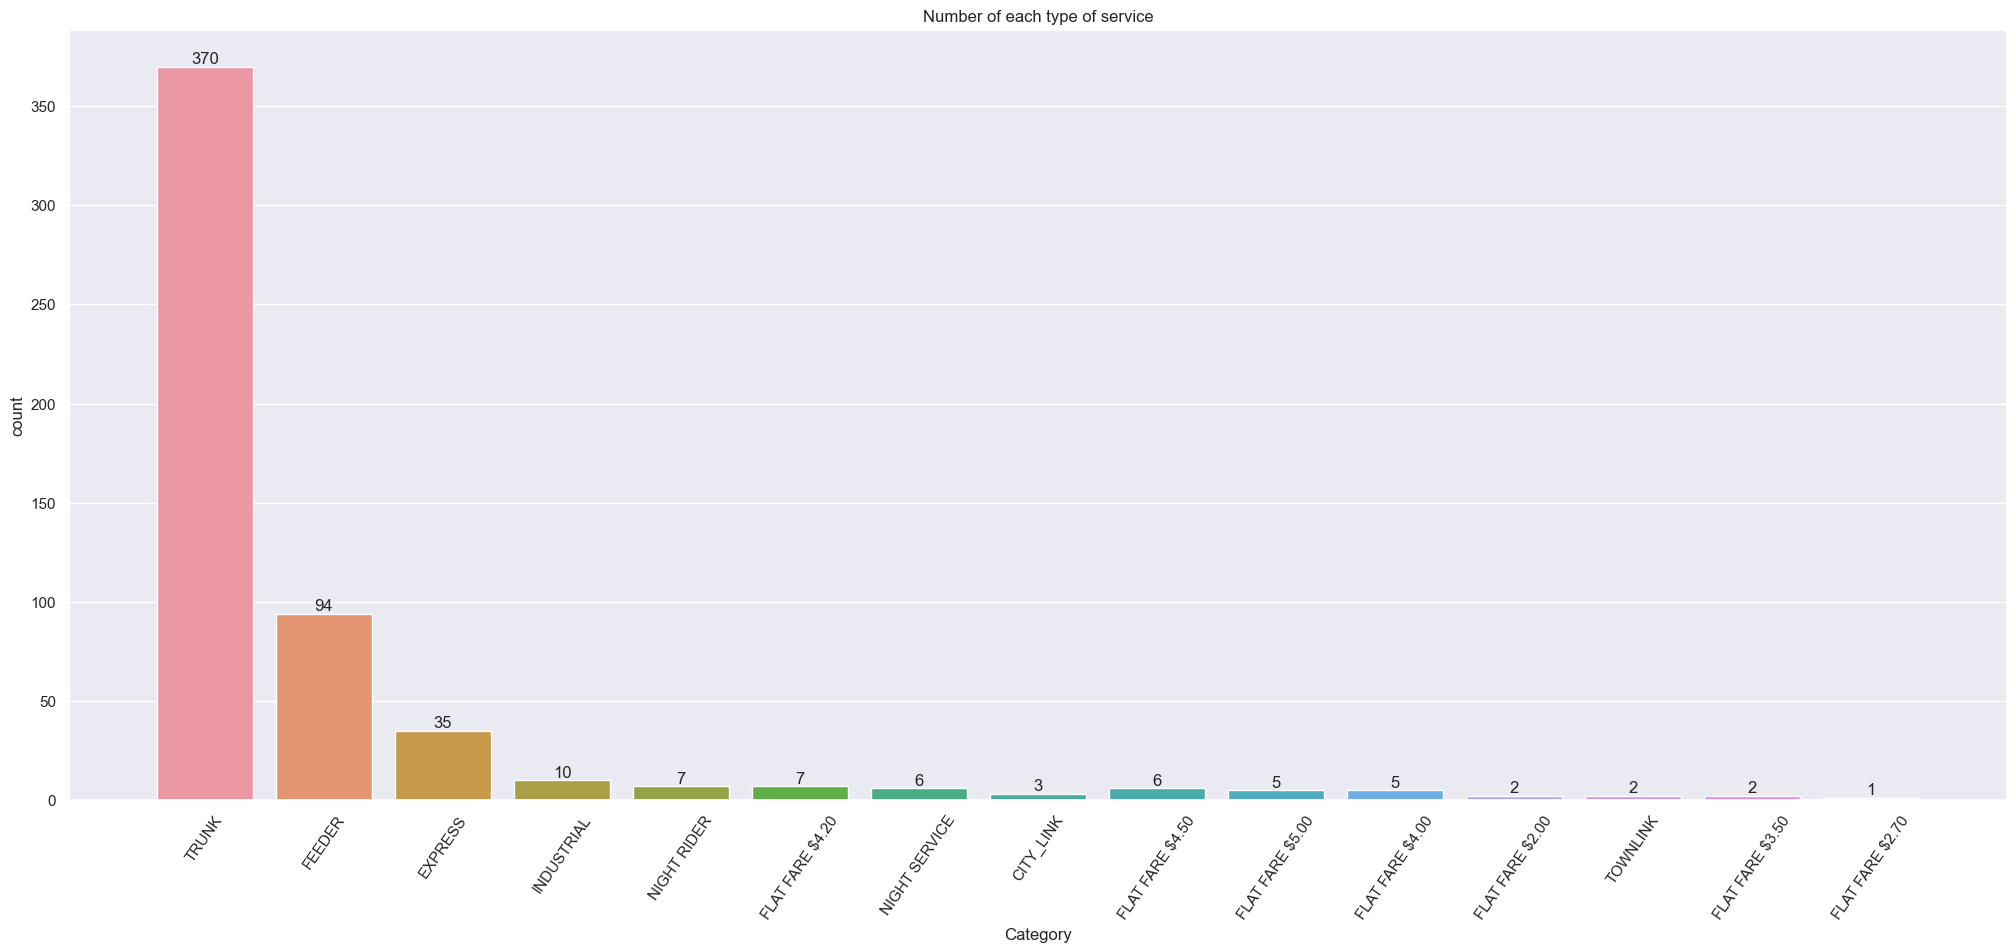

In [345]:
ax = sns.countplot(data=uniqueService, x='Category', order=bus_services['Category'].value_counts().index)
sns.set(rc={'figure.figsize':(25,10)})
ax.set_title("Number of each type of service")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 55)
ax.bar_label(ax.containers[0])
ax.plot()

c:\Users\Hong Yi\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


[]

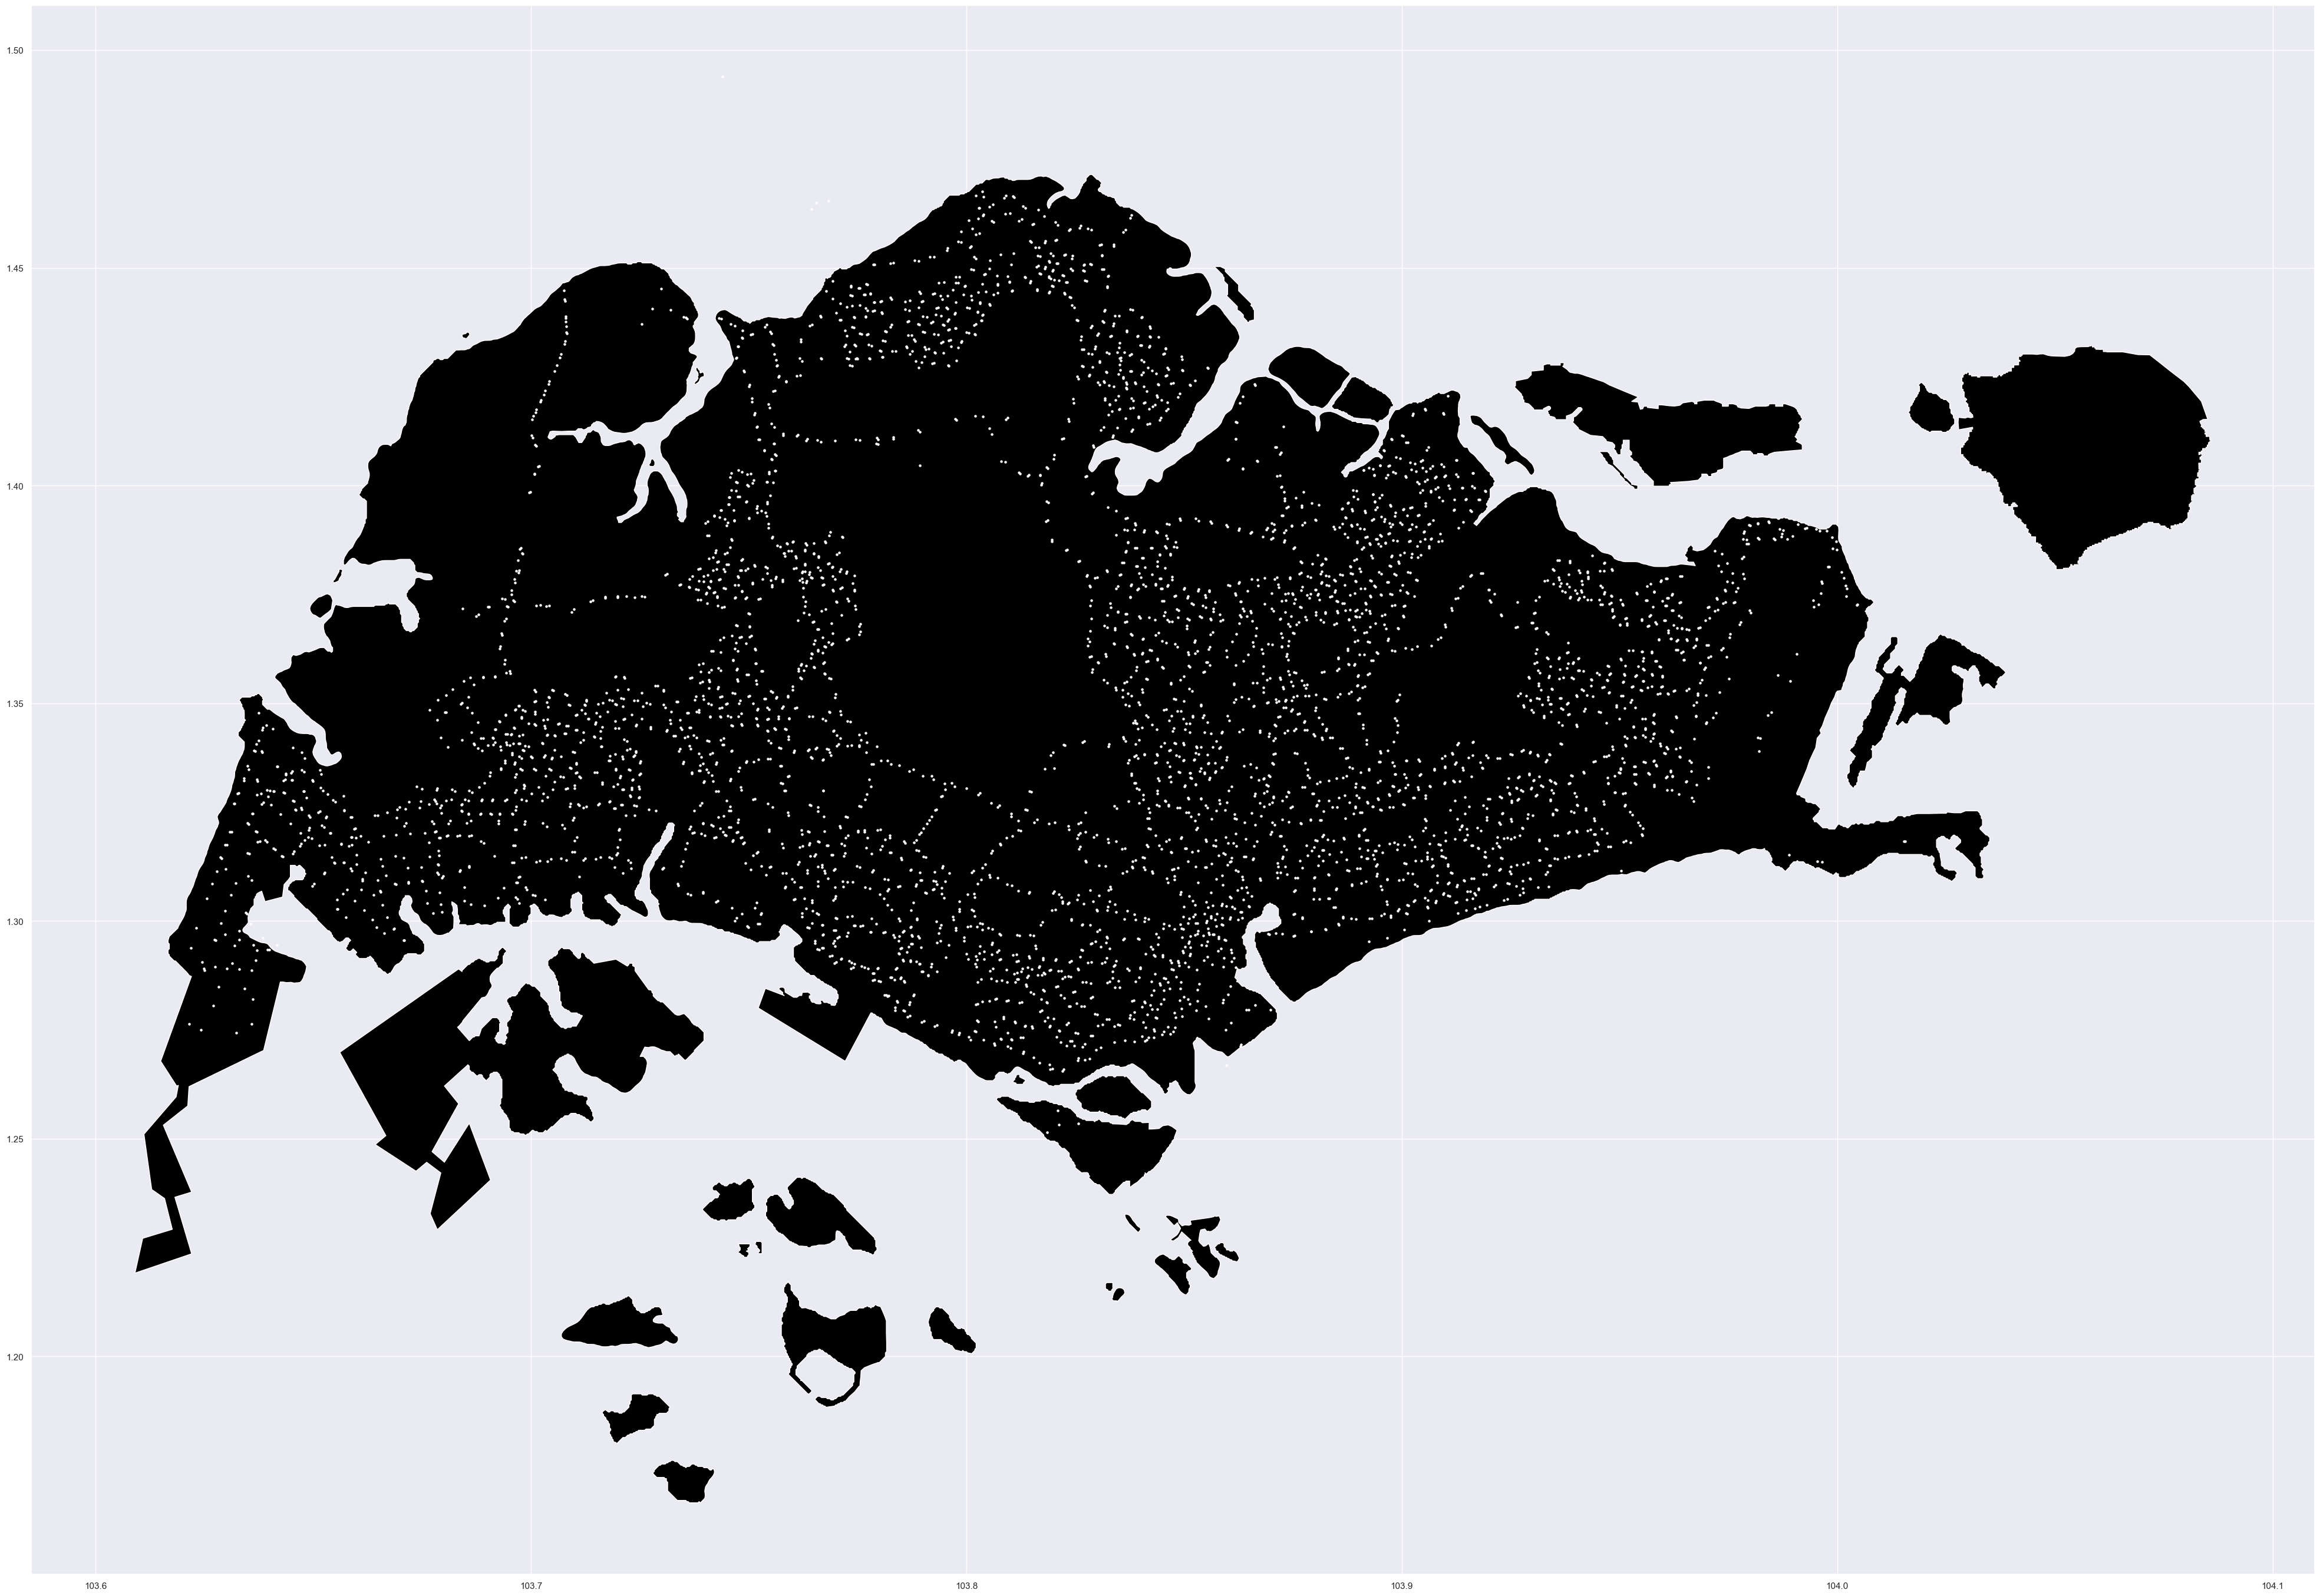

In [346]:
locationArray = bus_stops[["Latitude",'Longitude']]
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(locationArray["Longitude"], locationArray["Latitude"])]
gpLocArray = gpd.GeoDataFrame(locationArray, crs = crs, geometry = geometry)

sf = "../stanford-pg798kr1205-shapefile.zip"
singaporeShape = gpd.read_file(sf)

fig, ax = plt.subplots(figsize=(50,50))
singaporeShape.plot(ax = ax, color = "black")
gpLocArray.plot(ax = ax, color = "white",  markersize = 5)
ax.plot()